<a href="https://colab.research.google.com/github/thaohung13/BAO_CAO_GIUA_KY_AI/blob/main/Bai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tải tập dữ liệu hình ảnh, chuyển đổi chúng thành mảng NumPy,
#và lưu các mảng này vào đĩa để sử dụng trong quá trình đào tạo hoặc kiểm tra mô hình.
from os import listdir               # lấy danh sách tệp trong thư mục huấn luyện
from numpy import asarray            # chuyển đổi danh sách ảnh và nhãn thành mảng NumPy
from numpy import save               # lưu thành tệp
from keras.utils import load_img     # load_img: để tải ảnh từ tệp
from keras.utils import img_to_array # img_to_array: chuyển đổi thành mảng NumPy
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.saving.saving_lib import load_model
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses
loss = losses
batch_size = 32
epochs = 150
classes = 9

In [ ]:
# đoạn mã này được sử dụng để tải các tệp ảnh và nhãn tương ứng từ thư mục trên Google Drive
# chuẩn bị chúng cho việc huấn luyện mô hình học máy.
folder = '/content/drive/MyDrive/BAI3/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0
  if file.startswith('5k'):
    output= 1
  if file.startswith('10k'):
    output= 2
  if file.startswith('20k'):
    output= 3
  if file.startswith('30k'):
    output= 4
  if file.startswith('50k'):
    output= 5
  if file.startswith('100k'):
    output= 6
  if file.startswith('200k'):
    output= 7  
  if file.startswith('500k'):
    output= 8
  photo = load_img(folder + file, target_size= (40,40))
  photo = img_to_array(photo) # Chuyển đổi ảnh thành một mảng NumPy
  photos.append(photo)  # Thêm mảng ảnh vào danh sách photos
  labels.append(output) # Thêm giá trị output tương ứng vào danh sách labels

In [ ]:
# lưu trữ các mảng numpy photos và labels
photos= asarray(photos) # Chuyển danh sách ảnh thành một mảng NumPy
labels= asarray(labels) # Chuyển danh sách nhãn thành một mảng NumPy
print(photos.shape, labels.shape) # In ra kích thước của mảng ảnh và mảng nhãn
# photos.shape trả về kích thước của mảng photos, được biểu diễn dưới dạng một tuple (số lượng phần tử theo chiều dọc, số lượng phần tử theo chiều ngang, số lượng kênh màu)
# labels.shape: trả về ảnh
save('/content/drive/MyDrive/model/money/MONEY_photos', photos)
save('/content/drive/MyDrive/model/money/MONEY_labels', labels)

(88, 40, 40, 3) (88,)


In [ ]:
split_index = int(0.2 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(17, 40, 40, 3) (71, 40, 40, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((71,40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((17,40, 40, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,9)
test_y = to_categorical(test_y,9)

In [ ]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
#Đưa vào ANN, bộ ANN để phân loại:
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))
model.add(Dropout(0.25))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [ ]:
#Compile:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size,epochs= epochs, verbose= 1)
eval = model.evaluate(test_x, test_y)
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Epoch 1/150
3/3 [==============================] - 7s 2s/step - loss: 2.2811 - accuracy: 0.2394
Epoch 2/150
3/3 [==============================] - 5s 1s/step - loss: 2.0655 - accuracy: 0.1408
Epoch 3/150
3/3 [==============================] - 5s 2s/step - loss: 1.9111 - accuracy: 0.3803
Epoch 4/150
3/3 [==============================] - 7s 2s/step - loss: 2.5780 - accuracy: 0.4085
Epoch 5/150
3/3 [==============================] - 5s 1s/step - loss: 1.9227 - accuracy: 0.3662
Epoch 6/150
3/3 [==============================] - 5s 2s/step - loss: 1.8362 - accuracy: 0.3380
Epoch 7/150
3/3 [==============================] - 6s 1s/step - loss: 1.7749 - accuracy: 0.3944
Epoch 8/150
3/3 [==============================] - 5s 1s/step - loss: 1.7825 - accuracy: 0.4085
Epoch 9/150
3/3 [==============================] - 6s 2s/step - loss: 1.7387 - accuracy: 0.3944
Epoch 10/150
3/3 [==============================] - 5s 1s/step - loss: 1.7702 - accuracy: 0.3944
Epoch 11/150
3/3 [=====================

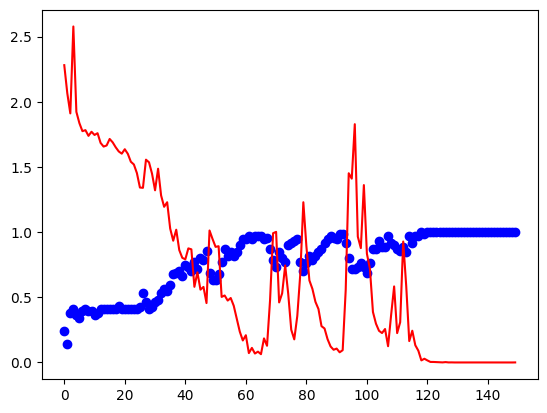

In [ ]:
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/data/money.h5')

1/1 [==============================] - 0s 57ms/step
100k


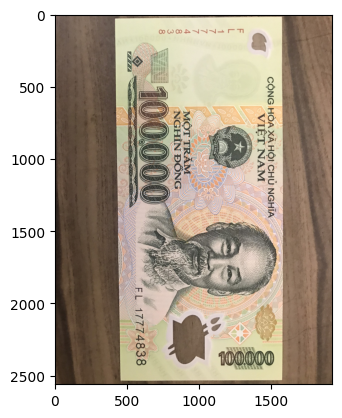

1/1 [==============================] - 0s 58ms/step
50k


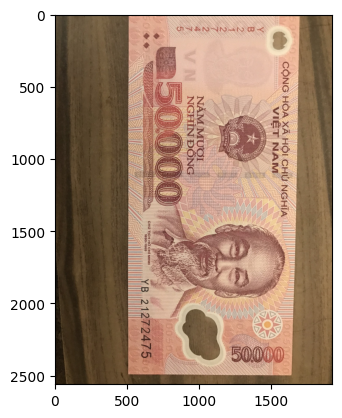

1/1 [==============================] - 0s 49ms/step


IndexError: ignored

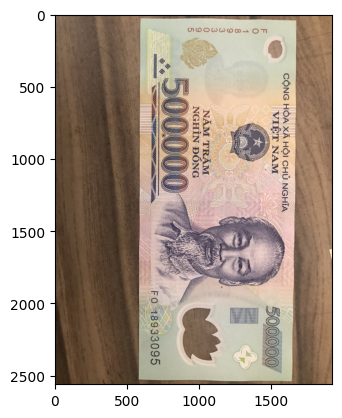

In [ ]:
folder = '/content/drive/MyDrive/ai/testmoney/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40,3))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['5k','10k','50k','20k','500k','200k','100k']
  print(class_name[result])
  plt.show()